<a href="https://colab.research.google.com/github/NavedMansuri/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project_By_Naved_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

---




## **Problem Statement**

Several health conditions, your lifestyle, and your age and family history can increase your risk for heart disease. These are called risk factors. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking.
Some risk factors for heart disease cannot be controlled, such as your age or family history. But you can take steps to lower your risk by changing the factors you can control.



*   The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

*   The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).
The dataset provides the patients' information. It includes over 3,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patients (Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

Behavioral:

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
* 

Medical( history):

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Objective: Building the classification model which best predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

## **Importing the libraries and Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv("/content/drive/MyDrive/Cardiovascular Risk Prediction - Naved/Data Set/data_cardiovascular_risk.csv")
df = pd.read_csv("/content/data_cardiovascular_risk.csv")

## **Data Exploration**

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.shape

(3390, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### **Checking missing values and treat**

In [9]:
null_val= df.isna().sum()
null_val.sum()

510

In [10]:
null_val

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

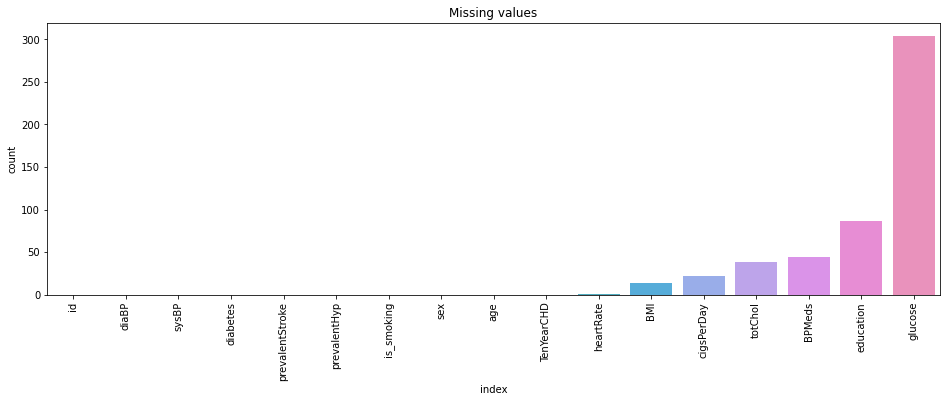

In [11]:
#Visualising the missing values through pointplot
missing = pd.DataFrame((null_val.sort_values(ascending=True))).reset_index()
plt.figure(figsize=(16,5))
ax = sns.barplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Missing values")
plt.ylabel("count")
plt.show()

**Glucose**

The **glucose** column contains 304 missing values. 

we have fill the missing values, so i am using median values for filling the missing values.

In [12]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [13]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [14]:
df['glucose'].isna().sum()

0

**Education**           

In [15]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [16]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

Education feature is not a continues variable so we using Mode for filling the missing values.


In [17]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [18]:
df['education'].isna().sum()

0

**CigsPerDay**          

In [19]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [20]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [21]:
df['cigsPerDay'].isna().sum()

0

**BPMeds**              

In [22]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [23]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [24]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [25]:
df['BPMeds'].isna().sum()

0

**TotChol**             

In [26]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [27]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

In [28]:
df['totChol'].isna().sum()

0

**heartRate** only 1 and **BMI** 14 missing values, so we simply drop that nan values.


In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Checking outliers and treat**

In [31]:
df.drop(['id'], inplace=True,axis=1)

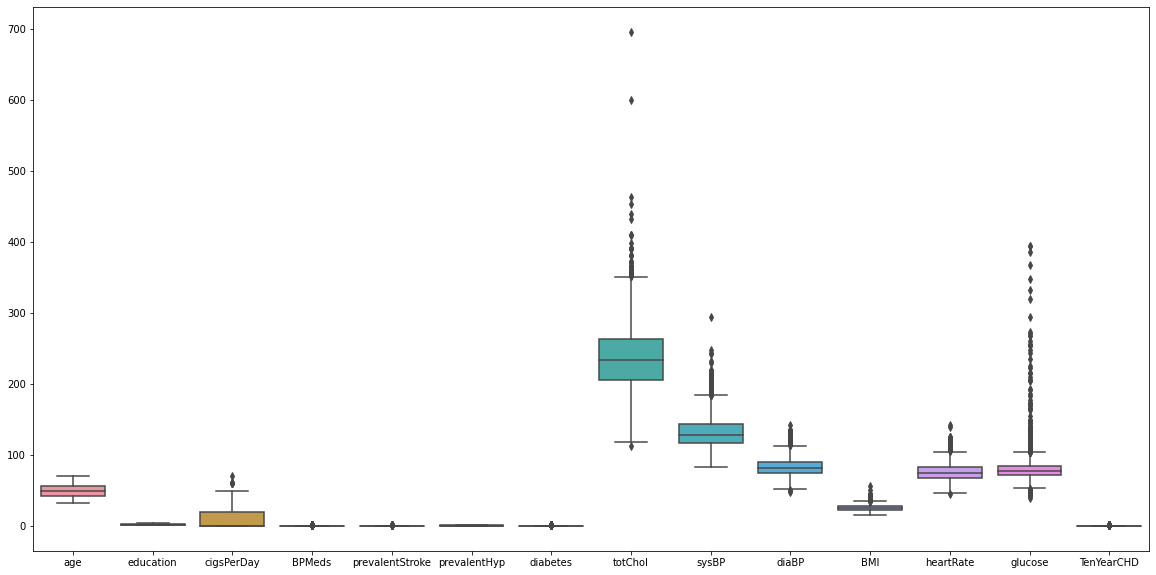

In [32]:
#Plotting the box plot for checking the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

Outliers are noticed in:
*  totChol
*  sysBP
*  diaBP
*  BMI
*  heartRate
*  glucose
*  cigsPerDay 



In [33]:
# Define a function for treating outliers
def outliers(data,cols):
    for i in cols:
        q1 = np.percentile(data[i], 25)
        q3 = np.percentile(data[i], 75) 
        IQR = q3-q1
        lwr_bound = q1-(IQR*1.5)
        upr_bound = q3+(IQR*1.5)       
        data[i]=np.where(data[i] > upr_bound,upr_bound,np.where(data[i] < lwr_bound,lwr_bound,data[i]))   

In [34]:
# Apply fuction to treat outlies       
feature=['cigsPerDay','sysBP','diaBP','totChol', 'BMI', 'heartRate', 'glucose']
outliers(df,feature)

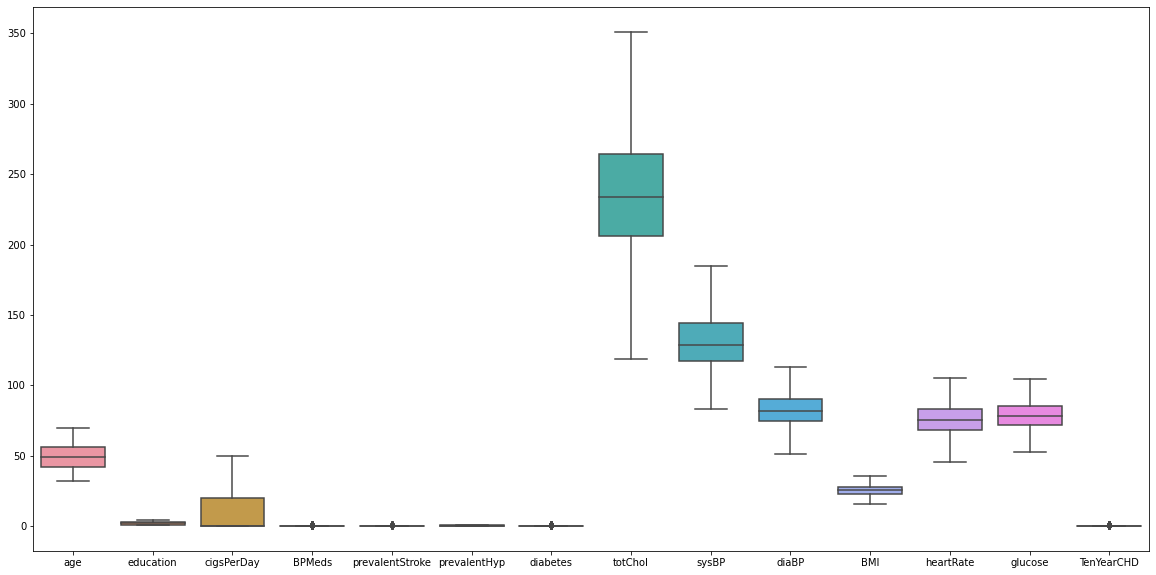

In [35]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

## **EDA**

### **Analyzing the distribution of dependent variable**

In [36]:
# defining dependent variable separately
dependent_var = ['TenYearCHD']

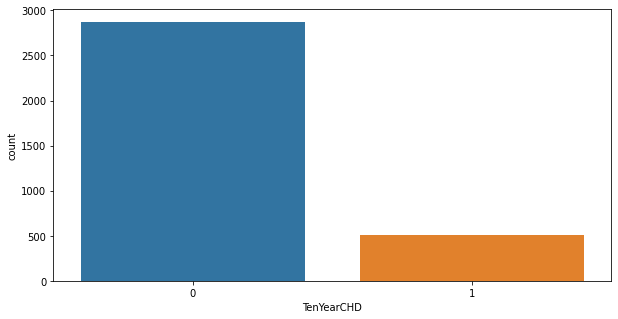

In [37]:
#looking for our dependent variable
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=df)

0 - **No coronary heart disease**

1 - **Risk of coronary heart diseas**

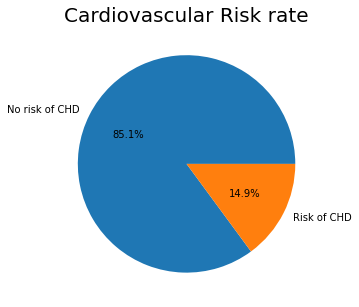

In [38]:
# Let's just have a look at the distribution of the target varibale
plt.figure(figsize=(10,5))
labels = ['No risk of CHD','Risk of CHD']
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels = labels)
plt.title("Cardiovascular Risk rate",size=20)
plt.show()

### **Analyzing the distribution of the continuous independent variables**


In [39]:
# defining the continuous variable
cont_var= ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

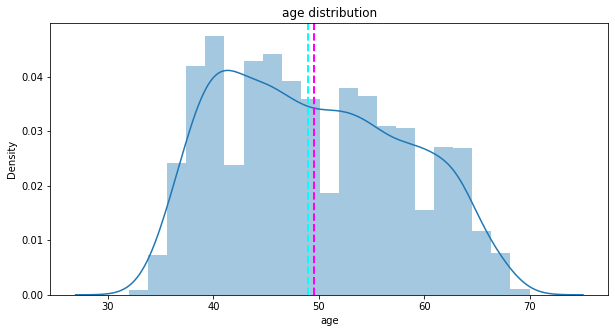

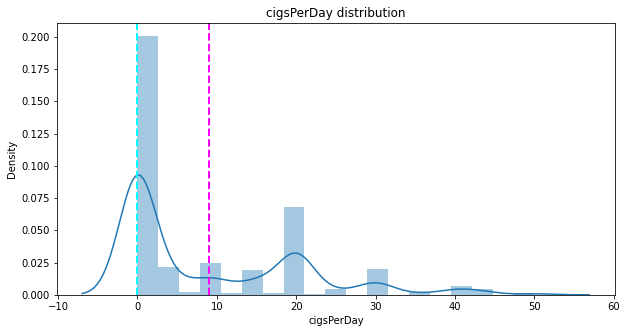

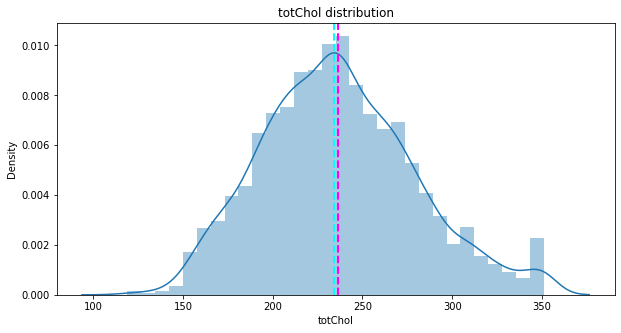

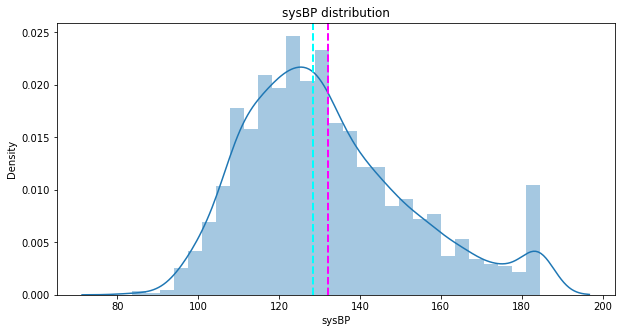

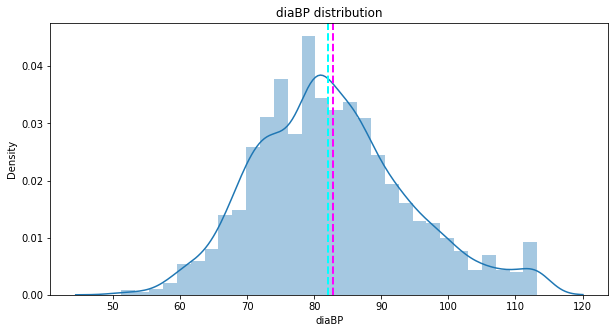

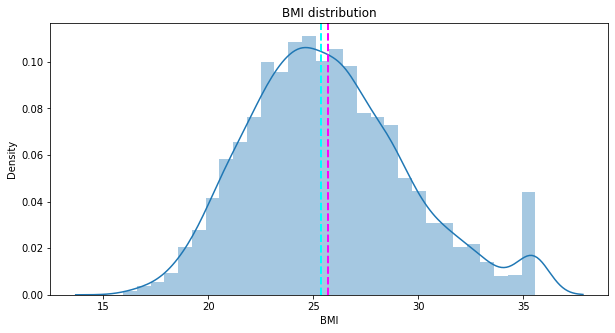

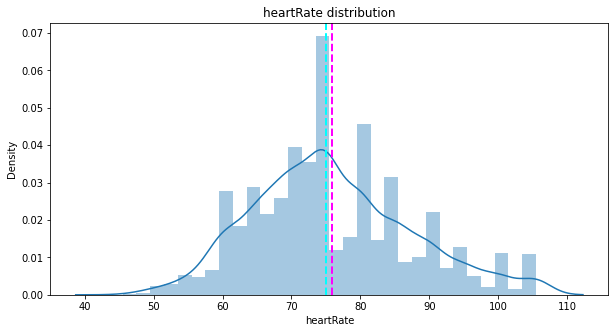

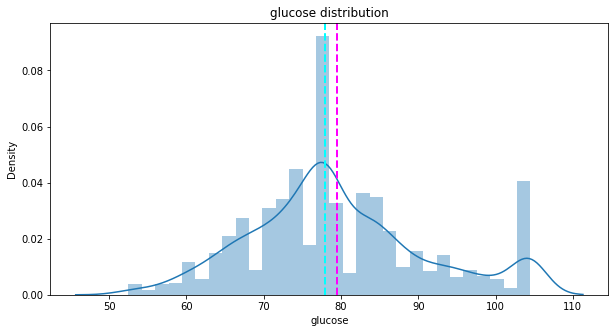

In [40]:
# Analysing the distribution of continuous variables in the dataset
for col in cont_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### **Analyzing the distribution of the categorical independent variables:**



In [41]:
# defining the categorical variable
categorical_var=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

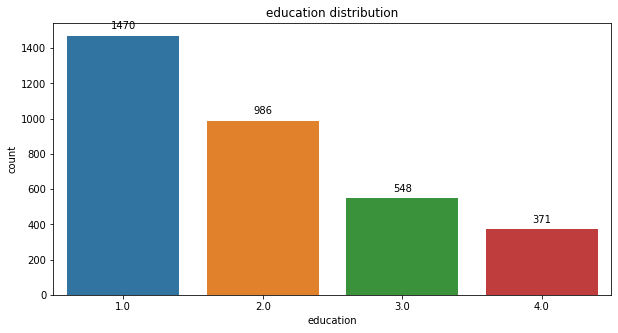

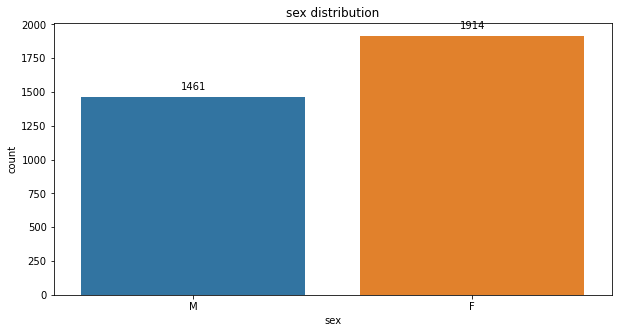

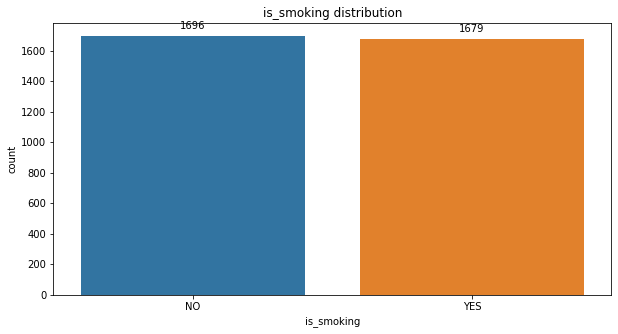

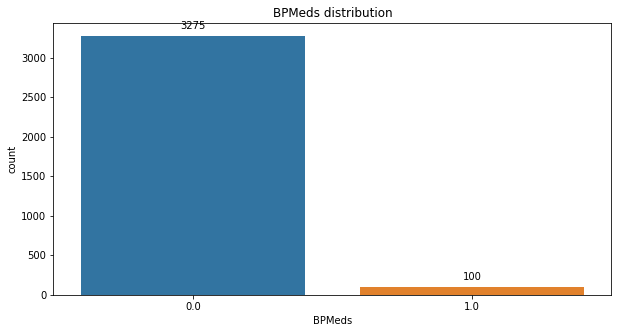

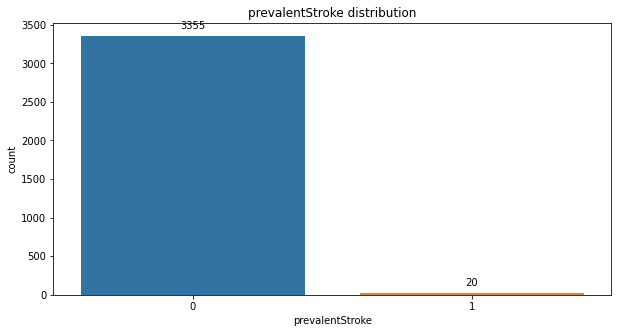

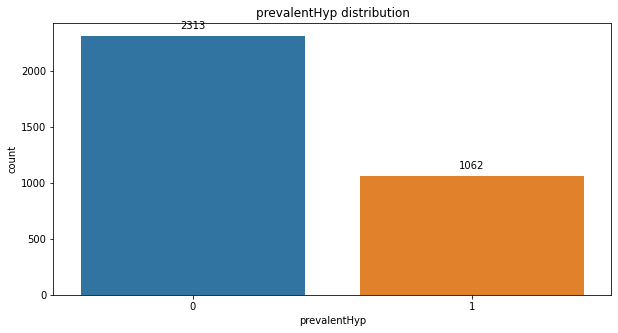

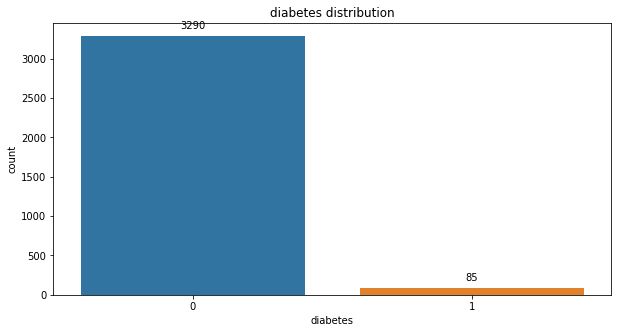

In [42]:
# Analysing the distribution of categorical variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

### **Analyzing the relationship between independent variables and dependent variables**

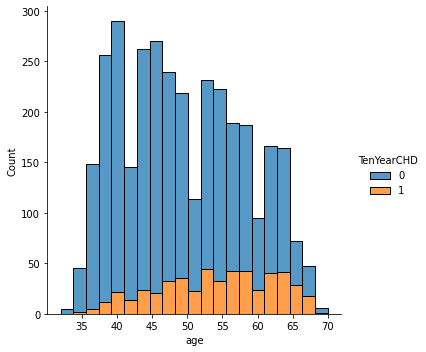

In [43]:
sns.displot(data=df, x="age", hue="TenYearCHD", multiple="stack")

According to the above plot, individuals between the ages of 45 and 65 have the highest risk of acquiring heart disease.

Because the number of peoples tends to increase with age.

---



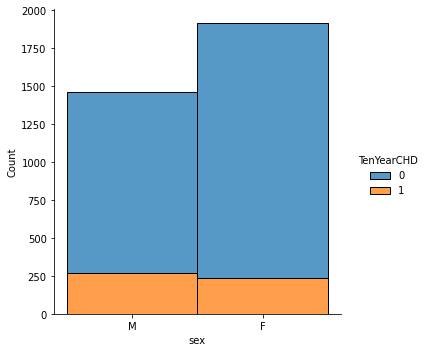

In [44]:
sns.displot(data=df, x="sex", hue="TenYearCHD", multiple="stack")

Cardiovascular heart disease affects slightly more men than women.

---



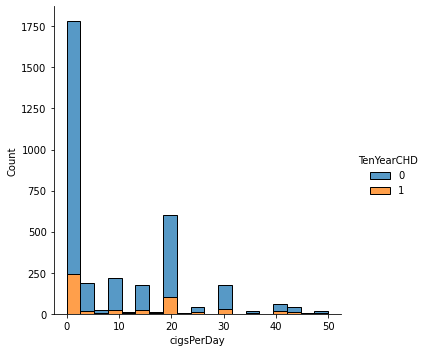

In [45]:
sns.displot(data=df, x="cigsPerDay", hue="TenYearCHD", multiple="stack")

Cardiovascular heart disease affects nearly equal numbers of smokers and nonsmokers.

---



Text(0.5, 1.0, 'Age group and Number of Smokers.')

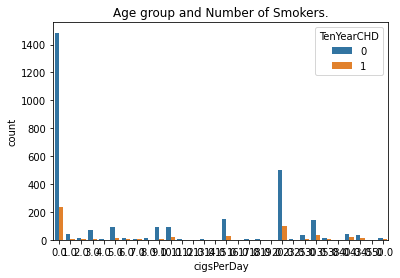

In [46]:
sns.countplot(data=df, x="cigsPerDay", hue="TenYearCHD")
plt.title("Age group and Number of Smokers.")

Text(0.5, 1.0, 'Age group and Number of Smokers.')

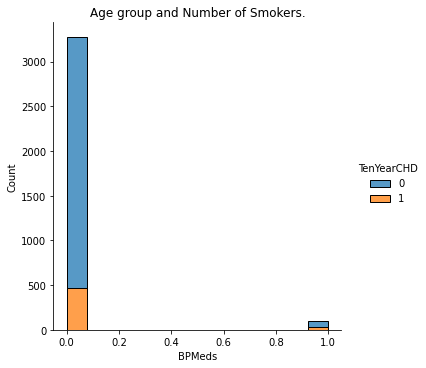

In [47]:
sns.displot(data=df, x="BPMeds", hue="TenYearCHD", multiple="stack")
plt.title("Age group and Number of Smokers.")

The percentage of people who take blood pressure medicine has a low risk of cardiovascular disease than those who do not.

Text(0.5, 1.0, 'Age group and Number of Smokers.')

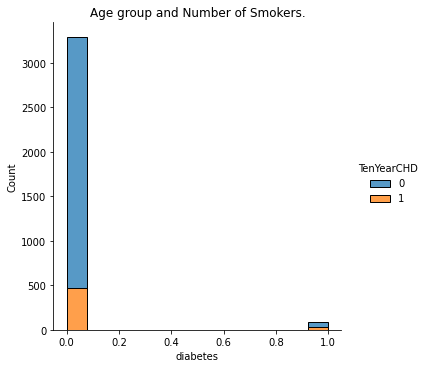

In [48]:
sns.displot(data=df, x="diabetes", hue="TenYearCHD", multiple="stack")
plt.title("Age group and Number of Smokers.")

Text(0.5, 1.0, 'Age group and Number of Smokers.')

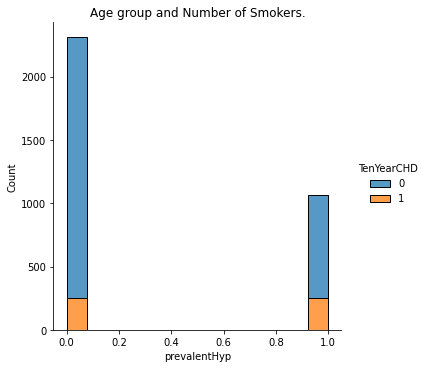

In [49]:
sns.displot(data=df, x="prevalentHyp", hue="TenYearCHD", multiple="stack")

plt.title("Age group and Number of Smokers.")

Text(0.5, 1.0, 'Age group and Number of Smokers.')

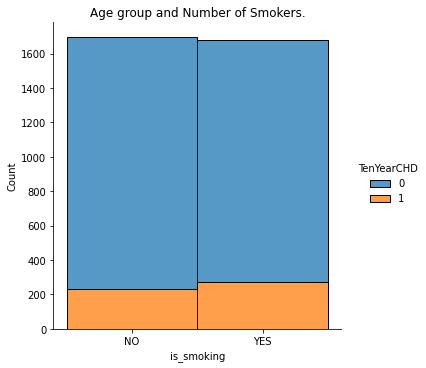

In [50]:
sns.displot(data=df, x="is_smoking", hue="TenYearCHD", multiple="stack")

plt.title("Age group and Number of Smokers.")

### **Label Encoding**

In [51]:
df['is_smoking'] = df['is_smoking'].replace({'YES': 1, 'NO': 0})
df['sex'] = df['sex'].replace({'M': 1, 'F': 0})

### **Correlation Analysis**

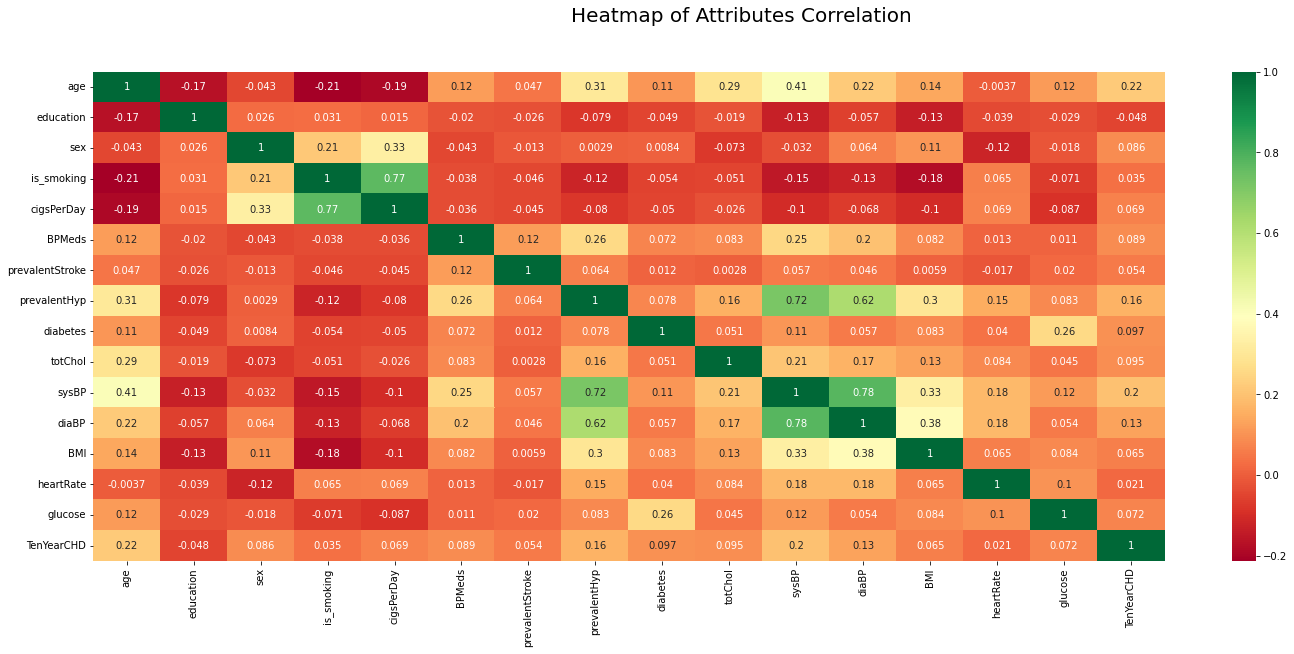

In [52]:
plt.figure(figsize=(24,9))
sns.heatmap(df.corr(), cmap="RdYlGn", annot = True)
plt.suptitle('Heatmap of Attributes Correlation', size=20)
plt.show()

**From the correlation map we have the following observations :**
1. Highest correlation between systolic BP and diastolic BP.
2. Systolic and Diastolic BP shows a high correlation with hypertension.
3. Variables such as age, prevalent hypertension, systolic BP, diastolic BP,.influence the risk of heart disease mainly.
4. cigarette smoking and the number of cigarretes smoked per day.
5. Systolic BP and age have a positive correleation.
**So we would required to select our features for our models performance.**

## **Feature Selection**

There is a high correlation between **sysBP(Systolic BP)** and **diaBP(Diastolic BP)**, and both of them influence our target variable to a greater extent, so we cannot drop them directly, but rather must find a parameter that can formulate these parameters together in such a way that we can add a single feature without experiencing multicollinearity or **pulse pressure**.

**Pulse Pressure = Systolic BP - Diastolic BP**

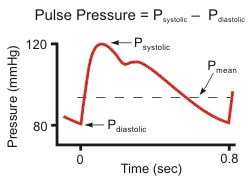

In [53]:
# Add pulse pressure as column
df['pulse_pressure'] = df['sysBP'] - df['diaBP']
# Drop the sysBP and diaBP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [54]:
# Check ones new columns
df.sample(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
3161,46,2.0,0,0,0.0,0.0,0,0,0,203.0,29.29,102.0,97.0,0,52.0
1738,52,1.0,0,0,0.0,0.0,0,0,0,245.0,32.04,80.0,81.0,0,51.0
516,40,1.0,0,1,9.0,0.0,0,0,0,262.0,22.14,72.0,80.0,0,26.0
1340,62,1.0,1,1,23.0,0.0,0,1,0,286.0,19.53,85.0,104.5,1,76.0
1039,40,2.0,1,1,25.0,0.0,0,0,0,335.0,23.60,85.0,76.0,0,52.5


**Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.**

**Feature Selection Models:**

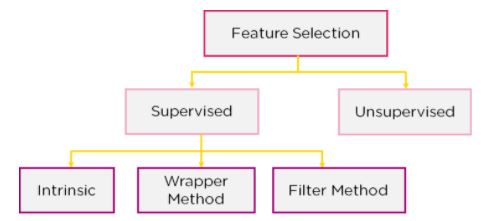

**Filter Method**:In this method, features are dropped based on their relation to the output, or how they are correlating to the output. We use correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly. they models are, 
* Information Gain, 
* Chi-Square Test, 
* Fisher’s Score, etc. 


In this model we using **Chi-Square** test for selecting the features that influence the most.

In [55]:
# Defining dependent and independent variables
X = df.drop('TenYearCHD',axis=1)
y = df[dependent_var]

In [56]:
from sklearn.feature_selection import SelectKBest

# apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization and printing the features in 
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Independent Feature','Chi_Score']  

In [57]:
#Creating the Dataframe from the above operation
featureScores = featureScores.sort_values(by='Chi_Score', ascending=False)
featureScores

,Independent Feature,Chi_Score
13,pulse_pressure,465.851744
4,cigsPerDay,248.923142
0,age,242.764664
9,totChol,233.874879
7,prevalentHyp,61.108586
8,diabetes,31.173738
12,glucose,28.861376
5,BPMeds,25.821088
2,sex,14.179124
6,prevalentStroke,9.932176


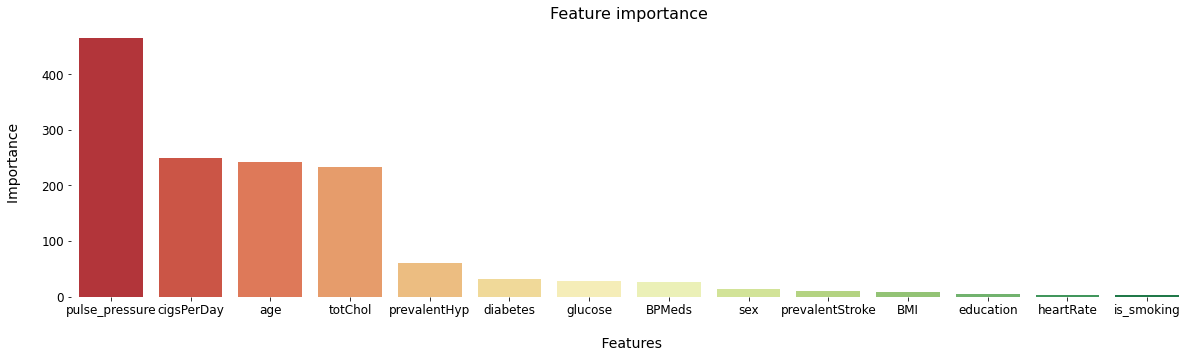

In [58]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Independent Feature', y='Chi_Score', data=featureScores, palette = "RdYlGn")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**we observe BMI,education,heartrate,sex and is smoking very less chi2 score. hence remove those columns.**

In [59]:
df.drop(['BMI','education','heartRate','is_smoking','sex','prevalentStroke'], axis = 1,inplace=True)

In [60]:
# data frame with core features lets, look df
df.sample(5)

,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,glucose,TenYearCHD,pulse_pressure
1476,59,0.0,0.0,1,0,244.0,85.0,0,75.0
474,42,0.0,0.0,0,0,234.0,78.0,0,43.5
1281,54,0.0,0.0,1,1,326.0,104.5,0,89.5
1357,41,5.0,0.0,0,0,209.0,78.0,0,32.5
260,39,5.0,0.0,0,0,184.0,78.0,0,24.0


## **Handling Imbalanced Data**

We oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique) to ensure that the model is trained equally on all results, and is not biased to one particular result.

Since our dataset is imbalanced, with more negative cases than positive cases, we may end up with a classifier that is biased towards the negative cases. The classifier may have high accuracy, but poor precision and recall.

In [61]:
# Defining dependent and independent variables
X = df.drop('TenYearCHD',axis=1)
y = df[dependent_var]

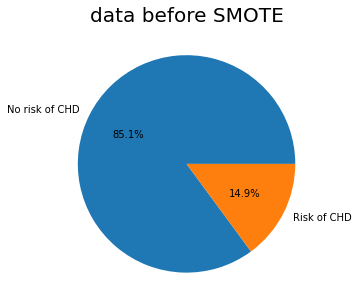

In [62]:
# Let's just have a look traget variable before applying SMOTE
plt.figure(figsize=(10,5))
labels = ['No risk of CHD','Risk of CHD']
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels = labels)
plt.title("data before SMOTE",size=20)
plt.show()

In [63]:
# Resampling the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_smote, y_smote = smote.fit_resample(X, y)
# X, y = sm.fit_resample(df_transformed.drop('TenYearCHD', axis=1), df_transformed['TenYearCHD'])
df_smote = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

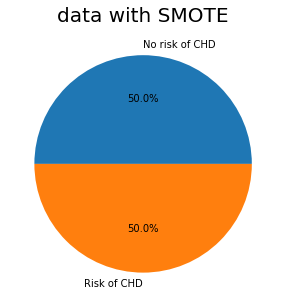

In [64]:
# Let's just have a look traget variable after applying SMOTE
plt.figure(figsize=(10,5))
labels = ['No risk of CHD','Risk of CHD']
plt.pie(df_smote["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels = labels)
plt.title("data with SMOTE",size=20)
plt.show() 

**We have successfully oversampled the minority class using SMOTE. Now, the model we build will be able to learn from both classes without any bias.**

## **Model Training**

**Splitting the data to Training and Testing set**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

**Scaling the data**

In [66]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Building**

### **Logistic Regression with GridesearchCV**

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [68]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logi_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [69]:
#training the classifier
logi_clf.fit(X_train,y_train)

logi_clf.best_params_    

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}

In [70]:
logi_predict = logi_clf.predict(X_test)

In [71]:
# #Performance Metrics
logi_accuracy= accuracy_score(logi_predict,y_test)
logi_precision= precision_score(logi_predict,y_test)
logi_recall= recall_score(logi_predict,y_test) 
logi_f1_score= f1_score(logi_predict, y_test)

print('Performance of Logistics regressions')
print('Accuracy :' , logi_accuracy.round(4))
print('Precision :', logi_precision.round(4))
print('Recall :', logi_recall.round(4))
print('F1 Score :', logi_f1_score.round(4))

Performance of Logistics regressions
Accuracy : 0.67
Precision : 0.6694
Recall : 0.6702
F1 Score : 0.6698


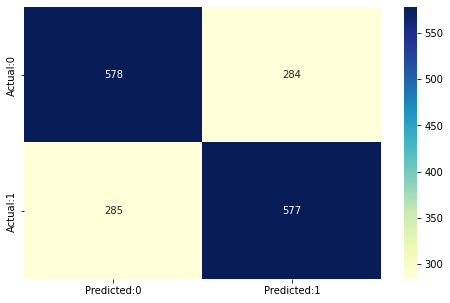

In [72]:
# confusion matrix of Logistic Model
cm=confusion_matrix(y_test,logi_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x432 with 0 Axes>

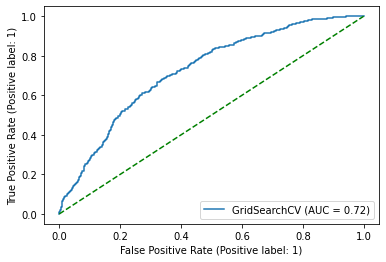

In [73]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,6))
svc_disp = plot_roc_curve(logi_clf,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='g')
plt.show()

### **Random Forest with GridesearchCV**

In [74]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }
random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

In [75]:
#training the classifier
random_clf.fit(X_train,y_train)

random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [76]:
#making predictions 
random_predict = random_clf.predict(X_test)

In [77]:
# #Performance Metrics
random_accuracy= accuracy_score(random_predict,y_test)
random_precision= precision_score(random_predict,y_test)
random_recall= recall_score(random_predict,y_test) 
random_f1_score= f1_score(random_predict, y_test)

print('Performance of Random forest classifiers')
print('Accuracy :' , random_accuracy.round(4))
print('Precision :', random_precision.round(4))
print('Recall :', random_recall.round(4))
print('F1 Score :', random_f1_score.round(4))

Performance of Random forest classifiers
Accuracy : 0.692
Precision : 0.7019
Recall : 0.6883
F1 Score : 0.695


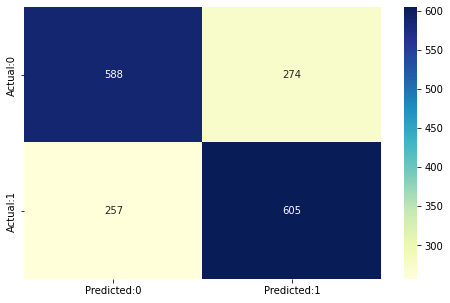

In [78]:
# confusion matrix of Random Forest
cm=confusion_matrix(y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x432 with 0 Axes>

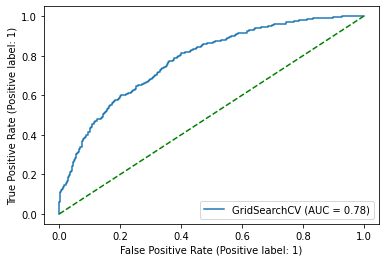

In [79]:
plt.figure(figsize=(15,6))
svc_disp = plot_roc_curve(random_clf,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='g')
plt.show()

### **SVM**

In [80]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [81]:
#training the classifier
svm_clf.fit(X_train,y_train)

svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [82]:
#making predictions 
svm_predict = svm_clf.predict(X_test)

In [83]:
# #Performance Metrics
svm_accuracy= accuracy_score(svm_predict,y_test)
svm_precision= precision_score(svm_predict,y_test)
svm_recall= recall_score(svm_predict,y_test) 
svm_f1_score= f1_score(svm_predict, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy.round(4))
print('Precision :', svm_precision.round(4))
print('Recall :', svm_recall.round(4))
print('F1 Score :', svm_f1_score.round(4))

Performance of Support Vector Machine Classifier
Accuracy : 0.6833
Precision : 0.6972
Recall : 0.6783
F1 Score : 0.6876


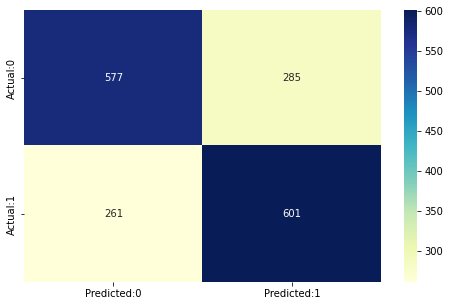

In [84]:
# confusion matrix of SVM 
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x432 with 0 Axes>

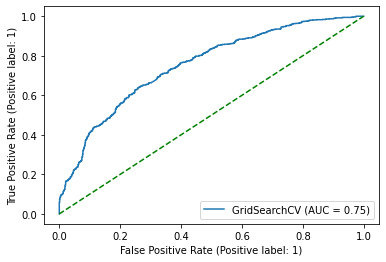

In [85]:
plt.figure(figsize=(15,6))
svc_disp = plot_roc_curve(svm_clf,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='g')
plt.show()

### **KNN**

In [86]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [87]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [88]:
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [89]:
#training the classifier
knn_clf.fit(X_train,y_train)

knn_clf.best_params_

{'n_neighbors': 1}

In [90]:
knn_predict= knn_clf.predict(X_test)

In [91]:
# #Performance Metrics
knn_accuracy= accuracy_score(knn_predict,y_test)
knn_precision= precision_score(knn_predict,y_test)
knn_recall= recall_score(knn_predict,y_test) 
knn_f1_score= f1_score(knn_predict, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy.round(4))
print('Precision :', knn_precision.round(4))
print('Recall :', knn_recall.round(4))
print('F1 Score :', knn_f1_score.round(4))

Performance of KNN Classifier
Accuracy : 0.8063
Precision : 0.891
Recall : 0.7619
F1 Score : 0.8214


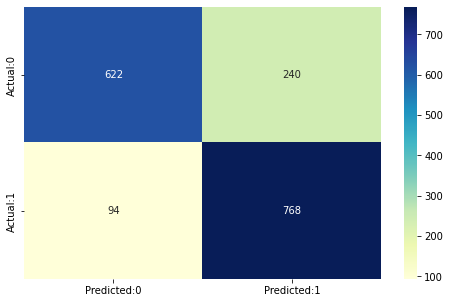

In [92]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x432 with 0 Axes>

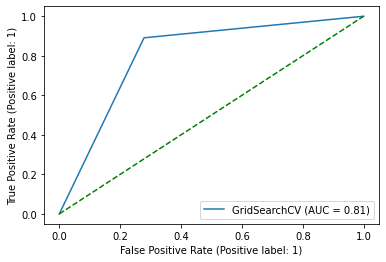

In [93]:
plt.figure(figsize=(15,6))
svc_disp = plot_roc_curve(knn_clf,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='g')
plt.show()

### **XGBoost**

In [94]:
params_xgb = {
    'max_depth': range (1,2,12),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }
xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')

In [95]:
#training the classifier
xgb_clf.fit(X_train,y_train)

xgb_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}

In [96]:
#making predictions 
xgb_predict = xgb_clf.predict(X_test)

In [97]:
# #Performance Metrics
xgb_accuracy= accuracy_score(xgb_predict,y_test)
xgb_precision= precision_score(xgb_predict,y_test)
xgb_recall= recall_score(xgb_predict,y_test) 
xgb_f1_score= f1_score(xgb_predict, y_test)

print('Performance of XGBoost Classifier')
print('Accuracy :' , xgb_accuracy.round(4))
print('Precision :', xgb_precision.round(4))
print('Recall :', xgb_recall.round(4))
print('F1 Score :', xgb_f1_score.round(4))

Performance of XGBoost Classifier
Accuracy : 0.6885
Precision : 0.7042
Recall : 0.6828
F1 Score : 0.6933


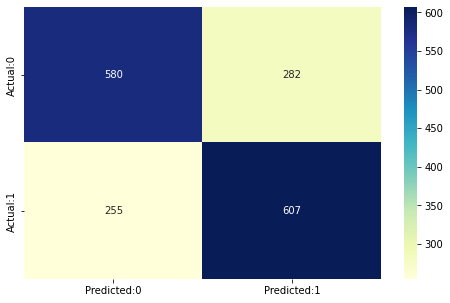

In [98]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x432 with 0 Axes>

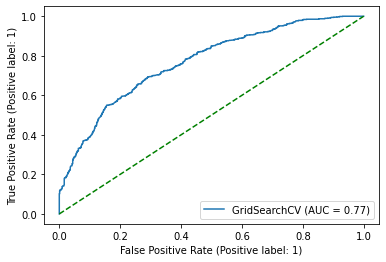

In [99]:
plt.figure(figsize=(15,6))
svc_disp = plot_roc_curve(xgb_clf,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='g')
plt.show()

## **Conclusion**

### **Comparing Performance of models**

In [100]:
#Comparing Performance of all classifier
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Support Vector Machines', 'K Nearest Neighbour', 'XGBoost'],
    'Accuracy': [logi_accuracy, random_accuracy, svm_accuracy, knn_accuracy, xgb_accuracy],
    'Precision': [logi_precision, random_precision, svm_precision, knn_precision, xgb_precision],
    'Recall': [logi_recall, random_recall, svm_recall, knn_recall, xgb_recall],
    'F1 Score': [logi_f1_score, random_f1_score, svm_f1_score, knn_f1_score, xgb_f1_score]})
models.sort_values(by='Accuracy', ascending=False)    

,Model,Accuracy,Precision,Recall,F1 Score
3,K Nearest Neighbour,0.806265,0.890951,0.761905,0.821390
1,Random Forest,0.691995,0.701856,0.688282,0.695003
4,XGBoost,0.688515,0.704176,0.682790,0.693318
2,Support Vector Machines,0.683295,0.697216,0.678330,0.687643
0,Logistic Regression,0.669954,0.669374,0.670151,0.669762


### **Summary and Conclusions**



---



---



1.    we trained 5 Machine Learning models, and hyperparameter adjustment was utilised models to increase model performance.
2.   The training dataset was oversampled using SMOTE to reduce bias on one outcome, missing values were handled, feature engineering, and feature selection were performed.
3. Cardiovascular heart disease affects a similar number of smokers and non-smokers.
4. `Age`, `total cholesterol`, `systolic blood` and `diastolic blood` pressure, `BMI`, `heart rate`, and `glucose` are the main factors in determining a person's 10-year chance of having cardiovasular heart disease.
5. **The K Nearest Neighbour is proved to be best algorithms can be used for the risk prediction of Cardiovasular heart disease.**
6. We chose the oversampling technique because the data provided to us had fewer records. But since there will be a lot of unbalanced and large amounts of health data, we can try to work on cost-sensitive learning, which, rather than changing the data records, only gives more weight to the minority and focuses on the individuals at high risk for heart disease.



### **References**

* Towards data science
* Analytics Vidhya
* W3 school
* Stackoverflow